# In this project I used the San Francisco Housing dataset (data from 2013-2015 sourced from SF Housing+Zillow database to predict home prices using regression as well as predict whether I can classify which neighborhood a property belongs using classification techniques

# Import necessary libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
%matplotlib inline
sns.set_style('whitegrid')
from sklearn import metrics
import datetime
pd.options.display.float_format = '{:.2f}'.format

# Import dataset (dataset avail on many sites, I grabbed from github)
    -Columns are relatively straightforward; you have data on a property's address, neighborhood, lat/long location, year it was built, selling price, square footage, total rooms (split into bed/bath), as well as zillow proprietary metrics such as (estimated price, value)

In [101]:
url = 'https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv'

home = pd.read_csv(url,sep=',')
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

# Dropping irrelevant columns (categorical which have no purpose if transformed into a numerical column, or provide a value estimate similar to our project goal) from dataset. 

In [102]:
home.drop(['Unnamed: 0','address','info','z_address','lastsolddate','zipcode','zpid','zindexvalue'],axis=1,inplace=True)

# Creating a dollar per sq ft column to assist in clustering properties later

In [103]:
home['dollarsqft'] = round(home['lastsoldprice']/home['finishedsqft'],2)

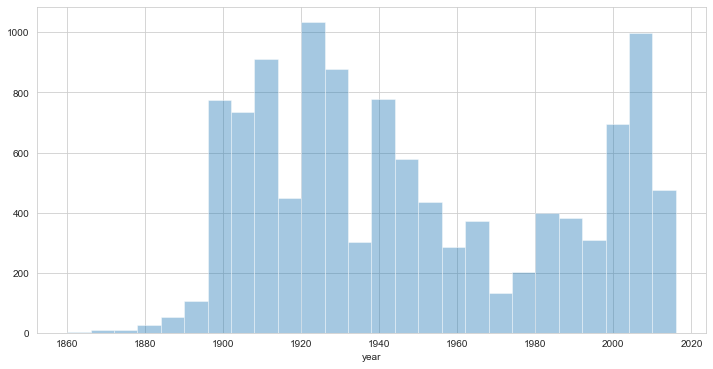

In [107]:
plt.figure(figsize=(12,6))
sns.distplot(home['year'],kde=False)

In [105]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      11330 non-null  float64
 1   bedrooms       11330 non-null  float64
 2   finishedsqft   11330 non-null  float64
 3   lastsoldprice  11330 non-null  float64
 4   latitude       11330 non-null  float64
 5   longitude      11330 non-null  float64
 6   neighborhood   11330 non-null  object 
 7   totalrooms     11330 non-null  float64
 8   usecode        11330 non-null  object 
 9   yearbuilt      11330 non-null  float64
 10  zestimate      11330 non-null  float64
 11  dollarsqft     11330 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.0+ MB


In [108]:
home.loc[home['year'].between(1860,1890)]

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,dollarsqft,year
9,2.00,3.00,2016.00,1500000.00,37.77,-122.43,Hayes Valley,7.00,Condominium,1547314.00,744.05,1890
37,1.00,1.00,1212.00,775000.00,37.76,-122.42,Mission,4.00,Condominium,1197178.00,639.44,1890
60,4.00,4.00,2850.00,2800000.00,37.79,-122.43,Lower Pacific Heights,7.00,Condominium,3032479.00,982.46,1890
80,2.00,3.00,1440.00,1275000.00,37.76,-122.42,Mission,7.00,Condominium,1472631.00,885.42,1885
91,1.00,1.00,1000.00,976000.00,37.80,-122.40,Telegraph Hill,3.00,Condominium,1044112.00,976.00,1870
...,...,...,...,...,...,...,...,...,...,...,...,...
11153,3.00,5.00,4000.00,1816000.00,37.79,-122.43,Lower Pacific Heights,12.00,SingleFamily,4607950.00,454.00,1880
11193,1.00,2.00,1290.00,1360000.00,37.77,-122.43,Hayes Valley,5.00,Condominium,1300892.00,1054.26,1885
11262,2.00,3.00,2016.00,1500000.00,37.77,-122.43,Hayes Valley,7.00,Condominium,1547364.00,744.05,1890
11290,1.00,1.00,1212.00,775000.00,37.76,-122.42,Mission,4.00,Condominium,1156228.00,639.44,1890


In [106]:
home['year'] = pd.to_datetime(home['yearbuilt'],format = '%Y').dt.year
home.drop(['yearbuilt'],axis=1,inplace=True)

In [109]:
home.year.value_counts()

1900    740
1925    265
2014    264
1924    261
1908    252
       ... 
1877      1
1863      1
1871      1
1860      1
1872      1
Name: year, Length: 147, dtype: int64

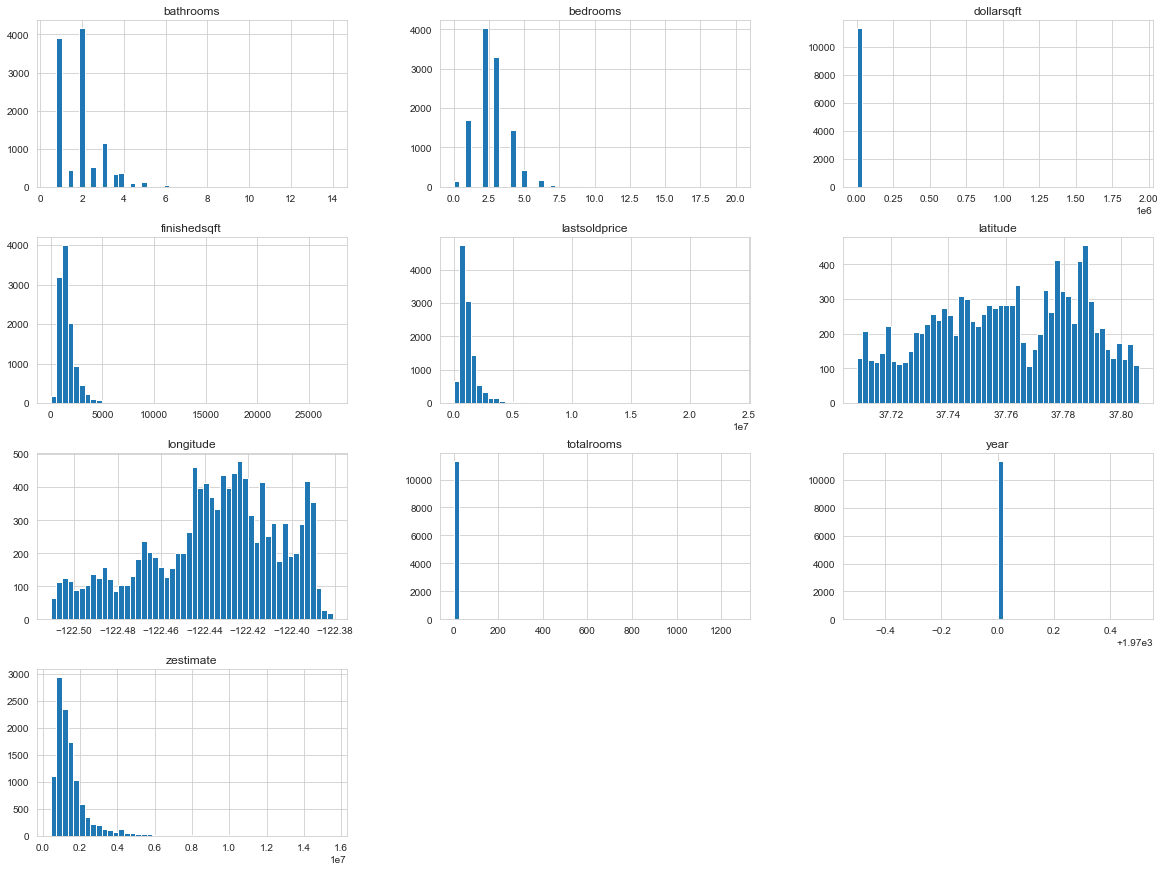

In [85]:
home.hist(bins=50, figsize=(20,15))
plt.show()

# Graphical check for any outliers in dataset
 -Following step to filter 

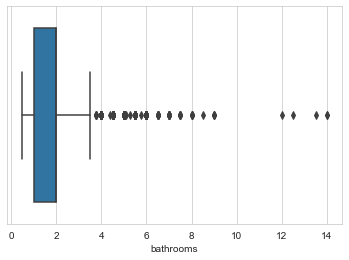

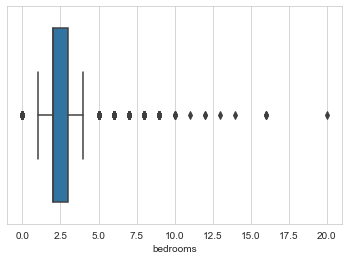

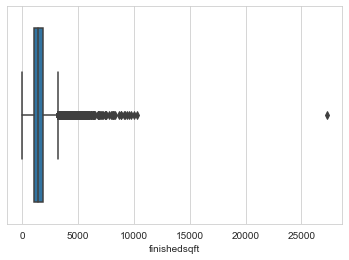

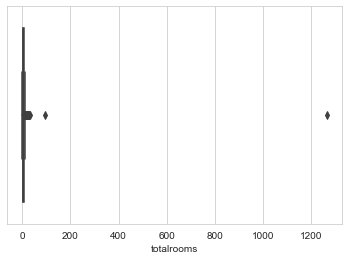

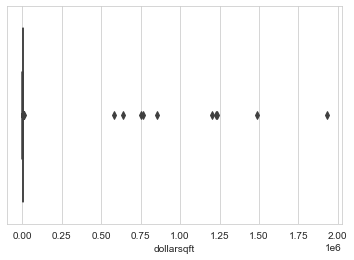

In [110]:
for i in ['bathrooms','bedrooms','finishedsqft','totalrooms','dollarsqft']:
    plt.figure()
    sns.boxplot(home[i])

In [111]:
bath = home['bathrooms'] <=4
bed = home['bedrooms'] <=5
finish = home['finishedsqft'] <=4000
total = home['totalrooms'] <=15
dollar = home['dollarsqft'] <=2000

In [112]:
home.loc[home['dollarsqft'] ==home['dollarsqft'].max()]

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,dollarsqft,year
3405,2.00,3.00,1.00,1930000.00,37.75,-122.43,Noe Valley,6.00,SingleFamily,2142580.00,1930000.00,1926


In [113]:
df = home[bath & bed & finish & total & dollar]

In [114]:
df.corr()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,zestimate,dollarsqft,year
bathrooms,1.00,0.65,0.69,0.50,-0.02,-0.09,0.55,0.54,-0.06,-0.04
bedrooms,0.65,1.00,0.71,0.39,-0.28,-0.29,0.72,0.44,-0.23,-0.32
finishedsqft,0.69,0.71,1.00,0.64,-0.04,-0.24,0.75,0.71,-0.17,-0.31
lastsoldprice,0.50,0.39,0.64,1.00,0.29,-0.04,0.41,0.86,0.58,-0.21
latitude,-0.02,-0.28,-0.04,0.29,1.00,0.13,-0.19,0.30,0.46,0.17
longitude,-0.09,-0.29,-0.24,-0.04,0.13,1.00,-0.29,-0.06,0.21,0.30
totalrooms,0.55,0.72,0.75,0.41,-0.19,-0.29,1.00,0.46,-0.22,-0.38
zestimate,0.54,0.44,0.71,0.86,0.30,-0.06,0.46,1.00,0.33,-0.21
dollarsqft,-0.06,-0.23,-0.17,0.58,0.46,0.21,-0.22,0.33,1.00,0.06
year,-0.04,-0.32,-0.31,-0.21,0.17,0.30,-0.38,-0.21,0.06,1.00


# Check for missing value before we proceed into our regression,classification analysis

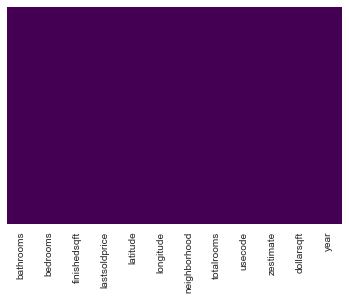

In [115]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [116]:
pd.DataFrame(df.corr()['lastsoldprice'].sort_values(ascending=False))

,lastsoldprice
lastsoldprice,1.00
zestimate,0.86
finishedsqft,0.64
dollarsqft,0.58
bathrooms,0.50
totalrooms,0.41
bedrooms,0.39
latitude,0.29
longitude,-0.04
year,-0.21


# Simple Linear Regression using the most correlated feature: Total Sq footage 

In [117]:
X = df[['finishedsqft']]
y = df['lastsoldprice']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [118]:
pred = lm.predict(X_test)

# From the results below, SLR isnt a particularly good fit, given that only 41% of the variation in data points are explained by our regression line. 

In [119]:
print('R squared:',lm.score(X_test,Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R squared: 0.41153512818673055
MAE: 342699.1105489302
RMSE: 490546.5691291937


# Multiple Linear Regression using the features below

In [120]:
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'latitude',
        'totalrooms', 'year', 'dollarsqft','zestimate']]
y = df['lastsoldprice']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=101)
lm.fit(X_train,Y_train)

LinearRegression()

In [121]:
pred = lm.predict(X_test)

In [122]:
coeff = pd.DataFrame(X.columns)
coeff.columns = ['Features']
coeff['Coefficient Estimates'] = pd.Series(lm.coef_)
coeff

,Features,Coefficient Estimates
0,bathrooms,4743.15
1,bedrooms,13268.70
2,finishedsqft,583.76
3,latitude,-1381479.81
4,totalrooms,-13126.78
5,year,-113.10
6,dollarsqft,1309.39
7,zestimate,0.24


#### Slightly more promising results using MLR. Roughly 93% of the variation can be explained by our model, and our model was able to estimate housing prices within 164k of its value 

In [123]:
print('R squared:',lm.score(X_test,Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R squared: 0.9339114349104964
MAE: 112605.37662609047
RMSE: 164392.92865006195


# One final MLR attempt. But first, I decided to cluster neighbhorhoods into  'poor, middle, wealthy' groups using dollar per sq ft. hopefully this eliminates some noise

In [146]:
mean = df.groupby('neighborhood').mean()['dollarsqft']
cluster = pd.DataFrame(mean)
cluster

,dollarsqft
neighborhood,
Bayview,421.05
Bernal Heights,867.62
Buena Vista Park,932.92
Central Richmond,677.78
Central Sunset,613.63
...,...
West Portal,708.16
Western Addition,606.87
Westwood Highlands,703.98


In [147]:
df.groupby('neighborhood').mean()['dollarsqft'].describe()

count     71.00
mean     766.03
std      185.10
min      374.20
25%      617.38
50%      756.37
75%      902.17
max     1120.96
Name: dollarsqft, dtype: float64

In [156]:
poor = cluster[cluster['dollarsqft'] <=617.38]
middlepoor = cluster[(cluster['dollarsqft']<=756.37) & (cluster['dollarsqft']>617.38)]
middlewealthy = cluster[(cluster['dollarsqft']<=902.17) & (cluster['dollarsqft']>756.37)]
wealthy = cluster[cluster['dollarsqft'] >902.17]

In [157]:
def group_neighborhood(x):
    if x in poor.index:
        return 'poor'
    elif x in middlepoor.index:
        return 'middlepoor'
    elif x in middlewealthy.index:
        return 'middlewealthy'
    else:
        return 'wealthy'

In [158]:
df['cluster'] = df['neighborhood'].apply(group_neighborhood)


C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df['cluster'].value_counts(normalize=True)

wealthy         0.31
middlewealthy   0.31
poor            0.20
middlepoor      0.19
Name: cluster, dtype: float64

In [160]:
cluster_numerical = pd.get_dummies(df['cluster'])

# I also used the get_dummies function to convert the categorical columns (cluster, and type of property)

In [162]:
usecode_numerical = pd.get_dummies(df['usecode'])
usecode_numerical.head()

,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [163]:
final = pd.concat([df,cluster_numerical,usecode_numerical],axis=1)
final.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,...,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.00,2.00,1043.00,1300000.00,37.78,-122.41,South of Market,4.00,Condominium,1167508.00,...,0,1,0,0,0,0,0,0,0,0
1,1.00,1.00,903.00,750000.00,37.78,-122.39,South of Market,3.00,Condominium,823719.00,...,0,1,0,0,0,0,0,0,0,0
2,4.00,3.00,1425.00,1495000.00,37.76,-122.40,Potrero Hill,6.00,Condominium,1708594.00,...,0,1,0,0,0,0,0,0,0,0
3,3.00,3.00,2231.00,2700000.00,37.76,-122.40,Potrero Hill,10.00,SingleFamily,2411236.00,...,0,0,0,0,0,0,0,0,1,0
4,3.00,3.00,1300.00,1530000.00,37.74,-122.41,Bernal Heights,4.00,SingleFamily,1918539.00,...,0,0,0,0,0,0,0,0,1,0


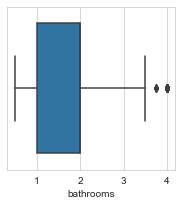

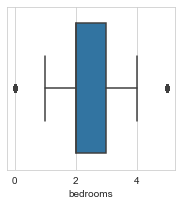

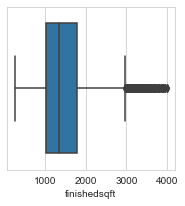

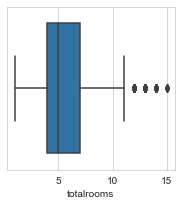

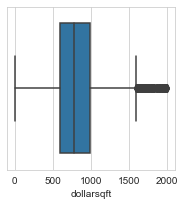

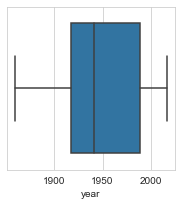

In [164]:
for feat in ['bathrooms','bedrooms','finishedsqft','totalrooms','dollarsqft','year']:
    plt.figure(figsize=(3,3))
    sns.boxplot(final[feat])

In [180]:
ba = final['bathrooms'] <=3.5
bdr = final['bedrooms'] <= 4
fin = final['finishedsqft'] <= 3300
tot = final['totalrooms'] <= 12
dol = final['dollarsqft'] <= 1800


reg_df = final[ba & bdr & fin & tot & dol]
reg_df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,zestimate,dollarsqft,year,...,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
count,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,...,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00,9995.00
mean,1.74,2.34,1387.36,1089164.80,37.76,-122.44,5.47,1341273.54,806.52,1950.86,...,0.00,0.47,0.00,0.01,0.00,0.00,0.03,0.00,0.49,0.01
std,0.70,0.93,544.80,578951.84,0.03,0.03,1.82,695905.58,290.02,37.96,...,0.01,0.50,0.01,0.07,0.04,0.01,0.17,0.01,0.50,0.08
min,0.50,0.00,243.00,535.00,37.71,-122.51,1.00,432385.00,0.47,1860.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,993.50,710000.00,37.74,-122.45,4.00,873858.00,600.66,1920.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,2.00,1294.00,941000.00,37.76,-122.43,5.00,1167568.00,789.21,1942.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,3.00,1700.00,1325000.00,37.78,-122.41,6.00,1571434.00,993.91,1990.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,3.50,4.00,3300.00,5075000.00,37.81,-122.38,12.00,6528242.00,1796.76,2016.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [183]:
reg_df.corr()['lastsoldprice'].sort_values(ascending=False)

lastsoldprice       1.00
zestimate           0.85
finishedsqft        0.63
dollarsqft          0.58
bathrooms           0.48
totalrooms          0.41
bedrooms            0.39
wealthy             0.37
latitude            0.28
SingleFamily        0.08
Miscellaneous       0.03
Mobile              0.01
Apartment           0.01
Cooperative         0.00
MultiFamily2To4    -0.01
Duplex             -0.01
MultiFamily5Plus   -0.01
Townhouse          -0.03
longitude          -0.04
middlewealthy      -0.04
middlepoor         -0.05
Condominium        -0.08
year               -0.20
poor               -0.33
Name: lastsoldprice, dtype: float64

In [170]:
ignore = ['lastsoldprice','neighborhood','usecode','cluster']
X = reg_df.drop(columns=ignore)
y = reg_df['lastsoldprice']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=101)
lm.fit(X_train,Y_train)

LinearRegression()

In [179]:
final_coeff = pd.DataFrame(X.columns)
final_coeff.columns = ['Features']
final_coeff['Coefficient'] = pd.Series(lm.coef_)
final_coeff

,Features,Coefficient
0,bathrooms,8411.20
1,bedrooms,10050.31
2,finishedsqft,584.96
3,latitude,-499178.63
4,longitude,-127247.60
5,totalrooms,-5214.57
6,zestimate,0.24
7,dollarsqft,1275.68
8,year,-332.46
9,middlepoor,6979.40


In [168]:
pred = lm.predict(X_test)

# 94% variation explained by model, with a prediction value 145k within accuracy. Best result weve seen so far!

In [169]:
print('R squared:',lm.score(X_test,Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R squared: 0.9390051929124067
MAE: 98679.77277177114
RMSE: 145025.48853622045


# Using classification (K Nearest Neighbors) to predict whih neighborhood a property belongs

In [184]:
reg_df

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,...,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.00,2.00,1043.00,1300000.00,37.78,-122.41,South of Market,4.00,Condominium,1167508.00,...,0,1,0,0,0,0,0,0,0,0
1,1.00,1.00,903.00,750000.00,37.78,-122.39,South of Market,3.00,Condominium,823719.00,...,0,1,0,0,0,0,0,0,0,0
3,3.00,3.00,2231.00,2700000.00,37.76,-122.40,Potrero Hill,10.00,SingleFamily,2411236.00,...,0,0,0,0,0,0,0,0,1,0
4,3.00,3.00,1300.00,1530000.00,37.74,-122.41,Bernal Heights,4.00,SingleFamily,1918539.00,...,0,0,0,0,0,0,0,0,1,0
5,1.00,2.00,1250.00,460000.00,37.71,-122.45,Crocker Amazon,5.00,SingleFamily,703392.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,2.00,3.00,2100.00,1950000.00,37.74,-122.43,Glen Park,10.00,SingleFamily,1895813.00,...,0,0,0,0,0,0,0,0,1,0
11326,2.00,2.00,977.00,1030000.00,37.78,-122.41,South of Market,5.00,MultiFamily2To4,999443.00,...,0,0,0,0,0,0,1,0,0,0
11327,1.00,2.00,875.00,565000.00,37.71,-122.47,Outer Mission,4.00,SingleFamily,639167.00,...,0,0,0,0,0,0,0,0,1,0
11328,1.00,2.00,697.00,762000.00,37.76,-122.51,Outer Sunset,4.00,SingleFamily,703197.00,...,0,0,0,0,0,0,0,0,1,0


In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting, scaling my model for KNN test preperation

In [186]:
scaler.fit(reg_df.drop(['cluster','neighborhood','usecode'],axis=1))

StandardScaler()

In [189]:
scaled_features = scaler.transform(reg_df.drop(['cluster','neighborhood','usecode'],axis=1))
scaled_features.shape

(9995, 24)

In [191]:
reg_df.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'zestimate',
       'dollarsqft', 'year', 'cluster', 'middlepoor', 'middlewealthy', 'poor',
       'wealthy', 'Apartment', 'Condominium', 'Cooperative', 'Duplex',
       'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus',
       'SingleFamily', 'Townhouse'],
      dtype='object')

In [192]:
columns_less_dropped = ['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'totalrooms','zestimate', 'dollarsqft',
       'year', 'middlepoor', 'middlewealthy', 'poor', 'wealthy',
       'Apartment', 'Condominium', 'Cooperative', 'Duplex', 'Miscellaneous',
       'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily',
       'Townhouse']

In [193]:
df_feat = pd.DataFrame(scaled_features,columns=columns_less_dropped)
df_feat.head(10)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,zestimate,dollarsqft,year,...,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,0.37,-0.37,-0.63,0.36,0.76,0.74,-0.81,-0.25,1.52,1.48,...,-0.01,1.07,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,-0.98,-0.08
1,-1.07,-1.45,-0.89,-0.59,0.72,1.36,-1.36,-0.74,0.08,1.40,...,-0.01,1.07,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,-0.98,-0.08
2,1.80,0.71,1.55,2.78,0.11,1.25,2.49,1.54,1.39,-0.63,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
3,1.80,0.71,-0.16,0.76,-0.72,0.71,-0.81,0.83,1.28,-1.34,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
4,-1.07,-0.37,-0.25,-1.09,-1.91,-0.34,-0.26,-0.92,-1.51,-0.71,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
5,-1.07,0.71,-0.65,-0.96,-1.61,-0.81,0.29,-0.86,-1.00,-0.31,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
6,-1.07,-0.37,-0.34,-0.07,-1.33,-0.12,-0.26,-0.46,0.24,-0.71,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
7,2.52,1.79,2.41,4.16,-0.26,0.01,1.94,3.25,1.69,-1.02,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08
8,0.37,0.71,1.15,0.71,0.55,0.10,0.84,0.30,-0.22,-1.60,...,-0.01,1.07,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,-0.98,-0.08
9,-1.07,0.71,0.75,-0.42,-1.29,0.90,1.39,-0.59,-1.15,0.06,...,-0.01,-0.94,-0.01,-0.07,-0.04,-0.01,-0.17,-0.01,1.02,-0.08


In [194]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,reg_df['neighborhood'],test_size=0.30)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Finding the K value that minimizes error

In [196]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

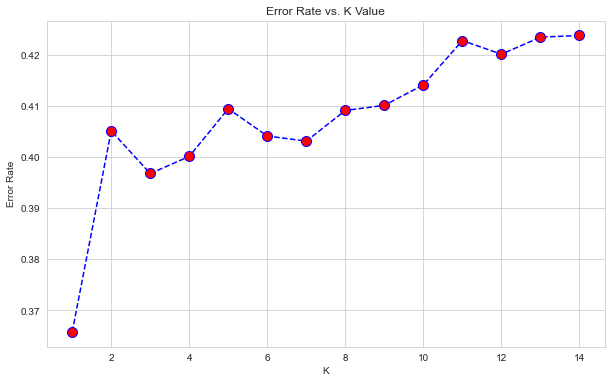

In [197]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [198]:
from sklearn.metrics import classification_report

In [199]:
K=1
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(classification_report(y_test,pred,zero_division=0))

WITH K=1


                                          precision    recall  f1-score   support

                                 Bayview       0.77      0.81      0.79        89
                          Bernal Heights       0.73      0.86      0.79       160
                        Buena Vista Park       0.14      0.27      0.18        15
                        Central Richmond       0.38      0.55      0.45        51
                          Central Sunset       0.89      0.93      0.91        60
           Central Waterfront - Dogpatch       0.53      0.67      0.59        12
                          Corona Heights       0.28      0.39      0.33        28
                              Cow Hollow       0.28      0.42      0.34        45
                          Crocker Amazon       0.44      0.74      0.55        34
                               Daly City       0.00      0.00      0.00         0
                         Diamond Heights       0.78      0.95      0.85        40
    

# KNN model predicted ~60% of neighborhoods accurately given the independent feature variables! 